<a href="https://colab.research.google.com/github/Afuhnwi-Afriitech/predict-car-prices/blob/main/predict_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predicting prices of bulldozers
Data is gotten from https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [18]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39562 entries, 0 to 39561
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   39562 non-null  int64  
 1   SalePrice                 39562 non-null  int64  
 2   MachineID                 39562 non-null  int64  
 3   ModelID                   39562 non-null  int64  
 4   datasource                39562 non-null  int64  
 5   auctioneerID              39562 non-null  int64  
 6   YearMade                  39562 non-null  int64  
 7   MachineHoursCurrentMeter  24731 non-null  float64
 8   UsageBand                 21805 non-null  object 
 9   saledate                  39562 non-null  object 
 10  fiModelDesc               39562 non-null  object 
 11  fiBaseModel               39561 non-null  object 
 12  fiSecondaryDesc           24421 non-null  object 
 13  fiModelSeries             3823 non-null   object 
 14  fiMode

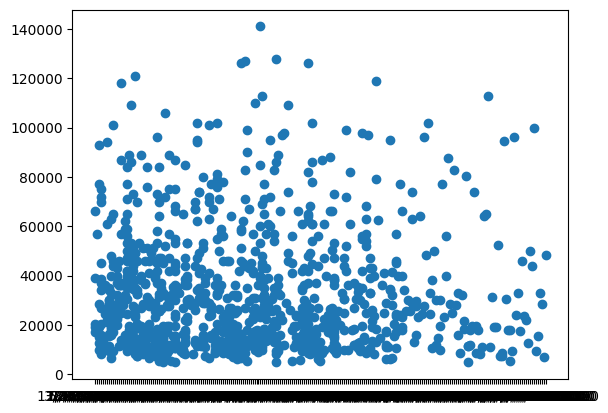

In [19]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

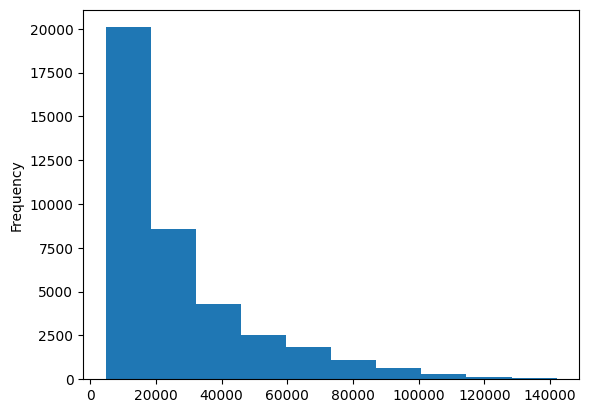

In [20]:
df.SalePrice.plot.hist()

In [21]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
df.saledate

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
39557,2005-09-20
39558,2006-08-25
39559,2005-03-01
39560,2002-07-11


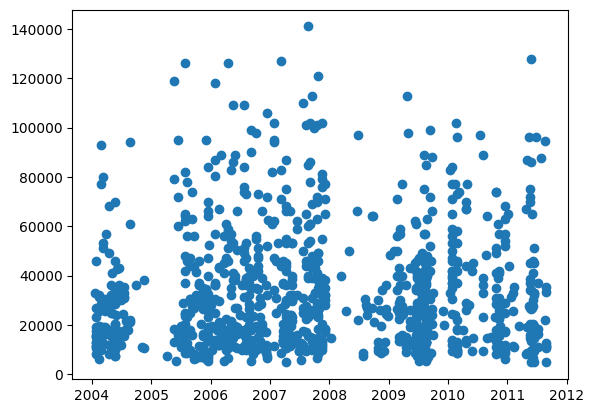

In [22]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [23]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.sort_values(by=["saledate"], inplace=True, ascending = True)
df.saledate.head(20)

,saledate
32138,1989-01-31
31494,1989-01-31
28757,1989-01-31
28927,1989-01-31
32317,1989-01-31
28820,1989-01-31
28603,1989-01-31
25894,1989-02-01
24108,1989-02-01
25017,1989-02-01


In [1]:
df_tmp = df.copy()
df_tmp.head()

NameError: name 'df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_tmp.drop("SalePrice", axis=1), df["SalePrice"])